In [1]:
#Import Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
#Reading and cleaning "Human Development Index" Data
humanDevIndex=pd.read_csv("Resources/HumanDevelopmentIndex.csv")

# Drop NAs from Data
humanDevIndex=humanDevIndex.dropna(how='any')

# Rename column "Country" to match with other dataset, which will help with 'merge'
humanDevIndex=humanDevIndex.rename(columns={"Country":"Country Name"})

# Changing the number format to 'float'
humanDevIndex=humanDevIndex.iloc[:,0:28]
humanDevIndex.iloc[:,2:28]=humanDevIndex.iloc[:,2:28].astype(float)
for i in range(2,28):
    humanDevIndex.iloc[:,i]=humanDevIndex.iloc[:,i].map("{:.2f}".format)

humanDevIndex.head()

,HDI Rank (2018),Country Name,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,170,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.48,0.49,0.49
1,69,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,0.71,0.72,0.72,0.73,0.74,0.76,0.77,0.78,0.79,0.79
2,82,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.70,0.71,0.71,0.72,0.73,0.74,0.74,0.75,0.75,0.75
6,48,Argentina,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,0.80,0.81,0.81,0.81,0.82,0.82,0.82,0.82,0.82,0.83
7,81,Armenia,0.63,0.63,0.58,0.59,0.60,0.60,0.61,0.62,...,0.71,0.72,0.73,0.72,0.73,0.73,0.74,0.74,0.75,0.75


In [3]:
# Number of countries in 'Human Development Index' dataset
humanDevIndex["Country Name"].count()

158

In [4]:
# Reading "Energy Consumption" Data
energyCons=pd.read_csv("Resources/TheWorldBank/EnergyConsumption.csv")

# Drop NAs from Data
energyCons=energyCons.dropna(how='any')

# Rename year columns for a cleaner look
energyCons=energyCons.iloc[:,2:30]
rename_map = {}
for columns in energyCons.columns:
    if '[' in columns:
         rename_map[columns] = columns.split()[0]
energyCons=energyCons.rename(columns=rename_map)

# Drop NAs, change the number format to float
energyCons=energyCons.dropna(how='any')
energyCons.dtypes
energyCons.iloc[:,2:28]=energyCons.iloc[:,2:28].astype(float)
for i in range(2,28):
    energyCons.iloc[:,i]=energyCons.iloc[:,i].map("{:.2f}".format)

energyCons.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,15.92,17.04,26.52,30.59,32.80,35.08,37.95,41.43,...,37.14,33.86,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42
1,Albania,ALB,25.52,33.00,46.81,51.15,51.46,50.61,51.64,55.95,...,31.71,32.10,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62
2,Algeria,DZA,0.18,0.32,0.29,0.48,0.40,0.42,0.39,0.47,...,0.41,0.41,0.30,0.31,0.26,0.18,0.19,0.14,0.07,0.06
3,American Samoa,ASM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.70,0.70,0.89
4,Andorra,AND,14.27,14.27,14.31,13.92,14.56,14.48,14.10,14.19,...,17.49,16.94,17.42,17.52,19.09,18.97,19.20,19.56,19.89,19.75


In [5]:
# Number of countries in 'Energy Consumption' dataset
energyCons["Country Name"].count()

243

In [6]:
# Merging two datasets
# Columns with HDI: Human Development Index
# Columns with EC: Energy Consumption Rate
merged_df=pd.merge(humanDevIndex,energyCons,on="Country Name",how='outer',suffixes=("_HDI","_EC"))
merged_df=merged_df.dropna(how='any')
merged_df.head()

,HDI Rank (2018),Country Name,1990_HDI,1991_HDI,1992_HDI,1993_HDI,1994_HDI,1995_HDI,1996_HDI,1997_HDI,...,2006_EC,2007_EC,2008_EC,2009_EC,2010_EC,2011_EC,2012_EC,2013_EC,2014_EC,2015_EC
0,170,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,37.14,33.86,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42
1,69,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,31.71,32.10,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62
2,82,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.41,0.41,0.30,0.31,0.26,0.18,0.19,0.14,0.07,0.06
3,48,Argentina,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,10.19,8.89,7.61,8.57,8.96,10.12,9.87,10.21,10.90,10.04
4,81,Armenia,0.63,0.63,0.58,0.59,0.60,0.60,0.61,0.62,...,7.65,7.02,6.41,7.80,9.36,8.01,6.57,6.77,7.72,15.79


In [7]:
# Number of countries in the merged dataset
merged_df["Country Name"].count()

127

In [8]:
# Clean the merged data. Remove parentheses in country names to avoid duplications
rename_value = {}
for countries in merged_df["Country Name"]:
    if ' (' in countries:
         rename_value[countries]=countries.split(" (")[0]
    else:
        merged_df["Country Name"]=merged_df["Country Name"]

merged_df["Country Name"]=merged_df["Country Name"].replace(rename_value)
merged_df=merged_df.groupby("Country Name").sum().reset_index()

# Drop NAs and remove column "Country Code"
merged_df=merged_df.dropna(how='any')
del merged_df["Country Code"]

In [9]:
# Remove the row with an error
merged_df=merged_df.drop([33],axis=0)

In [10]:
# Make sure all of the numbers are in float format
merged_df.iloc[:,2:52]=merged_df.iloc[:,2:52].astype(float)

In [11]:
# Show the columns
merged_df.columns

Index(['Country Name', 'HDI Rank (2018)', '1990_HDI', '1991_HDI', '1992_HDI',
       '1993_HDI', '1994_HDI', '1995_HDI', '1996_HDI', '1997_HDI', '1998_HDI',
       '1999_HDI', '2000_HDI', '2001_HDI', '2002_HDI', '2003_HDI', '2004_HDI',
       '2005_HDI', '2006_HDI', '2007_HDI', '2008_HDI', '2009_HDI', '2010_HDI',
       '2011_HDI', '2012_HDI', '2013_HDI', '2014_HDI', '2015_HDI', '1990_EC',
       '1991_EC', '1992_EC', '1993_EC', '1994_EC', '1995_EC', '1996_EC',
       '1997_EC', '1998_EC', '1999_EC', '2000_EC', '2001_EC', '2002_EC',
       '2003_EC', '2004_EC', '2005_EC', '2006_EC', '2007_EC', '2008_EC',
       '2009_EC', '2010_EC', '2011_EC', '2012_EC', '2013_EC', '2014_EC',
       '2015_EC'],
      dtype='object')

In [12]:
# Create two new columns, which calculates avg HDI index and energy consumption for each countries
merged_df["Avg HDI"]=merged_df.iloc[:,2:27].mean(axis=1)
merged_df["Avg Energy Consumption"]=merged_df.iloc[:,28:52].mean(axis=1)
merged_df["Total Energy Consumption"]=merged_df.iloc[:,28:52].sum(axis=1)

In [13]:
# Final version of out dataset
merged_df.head()

,Country Name,HDI Rank (2018),1990_HDI,1991_HDI,1992_HDI,1993_HDI,1994_HDI,1995_HDI,1996_HDI,1997_HDI,...,2009_EC,2010_EC,2011_EC,2012_EC,2013_EC,2014_EC,2015_EC,Avg HDI,Avg Energy Consumption,Total Energy Consumption
0,Afghanistan,170,0.3,0.3,0.31,0.31,0.3,0.33,0.33,0.34,...,17.81,14.84,11.48,13.97,16.33,19.31,18.42,0.3836,32.726250,785.43
1,Albania,69,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,37.22,37.12,35.96,40.05,41.29,38.69,38.62,0.6856,40.551667,973.24
2,Algeria,82,0.58,0.58,0.59,0.59,0.6,0.6,0.61,0.62,...,0.31,0.26,0.18,0.19,0.14,0.07,0.06,0.6652,0.377500,9.06
3,Argentina,48,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,8.57,8.96,10.12,9.87,10.21,10.90,10.04,0.7724,10.154583,243.71
4,Armenia,81,0.63,0.63,0.58,0.59,0.6,0.6,0.61,0.62,...,7.8,9.36,8.01,6.57,6.77,7.72,15.79,0.6684,8.228750,197.49


Correlation coefficient: -0.7740697545215723 



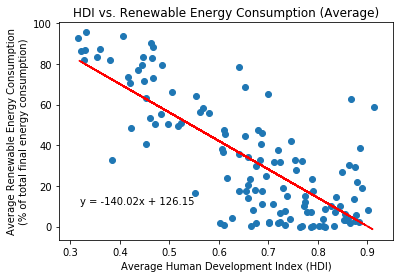

In [14]:
# Creating a scatter plot to see the relationship betweeen HDI and Renewable Energy Consumption:

# Creating labels and titles
plt.title("HDI vs. Renewable Energy Consumption (Average)")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

# Creating x and y axis
x_values = merged_df["Avg HDI"]
y_values = merged_df["Avg Energy Consumption"]

# Regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

In [15]:
# Grouping HDIs into 4 groups: Low, Medium, High and Very High Human Development:
    # HDI of less than 0.550 for low human development, 
    # 0.550–0.699 for medium human development, 
    # 0.700–0.799 for high human development 
    # and 0.800 or greater for very high human development.

# Creating a column "Development" to segment countries by their development level:
# Creating bins and labels for each segments
bins=[0,0.549,0.699,0.799,1]
labels=["Low Human Development","Medium Human Development", "High Human Development","Very High Human Development"]
merged_df["Development"]=pd.cut(merged_df["Avg HDI"],bins,labels=labels)

Correlation coefficient: -0.5117710583950983 



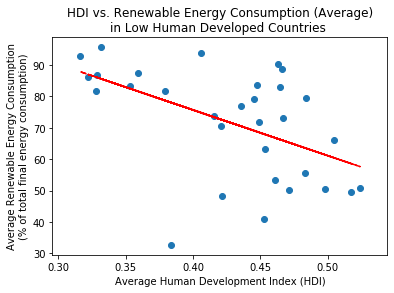

In [18]:
# Creating a scatter plot for each development segment to see the relationship betweeen HDI and Renewable Energy Consumption:

# Plot for "Low Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in Low Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

# Creating x and y axis
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="Low Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="Low Human Development"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression analysis
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")

print(f"Correlation coefficient: {rvalue} \n")

Correlation coefficient: -0.2212360416429177 



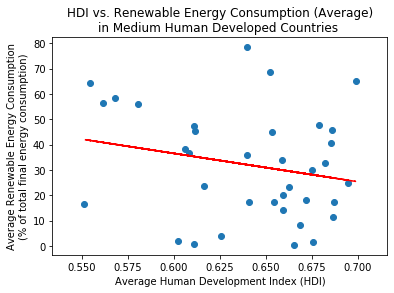

In [23]:
# Plot for "Medium Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in Medium Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

# Creating x and y axis
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="Medium Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="Medium Human Development"]

# Regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")

print(f"Correlation coefficient: {rvalue} \n")

Correlation coefficient: -0.06540311222389178 



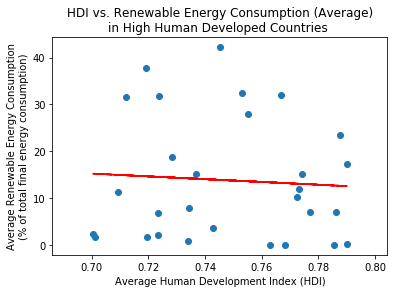

In [21]:
# Plot for "High Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in High Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

# Creating x and y axis
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="High Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="High Human Development"]

# Regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
#plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

Correlation coefficient: 0.49842352739145 



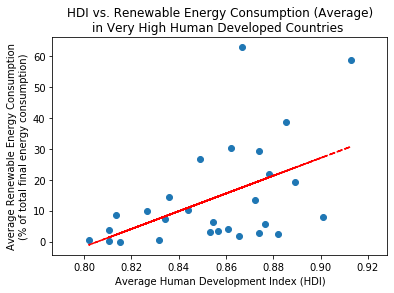

In [22]:
# Plot for "Very High Human Developed Countries"

# Creating labels and titles
plt.title(r"HDI vs. Renewable Energy Consumption (Average)" + "\n" + "in Very High Human Developed Countries ")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

# Creating x and y axis
x_values = merged_df["Avg HDI"].loc[merged_df["Development"]=="Very High Human Development"]
y_values = merged_df["Avg Energy Consumption"].loc[merged_df["Development"]=="Very High Human Development"]

# Regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
#plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

F_onewayResult(statistic=71.42862710607763, pvalue=1.4237724162476026e-26)

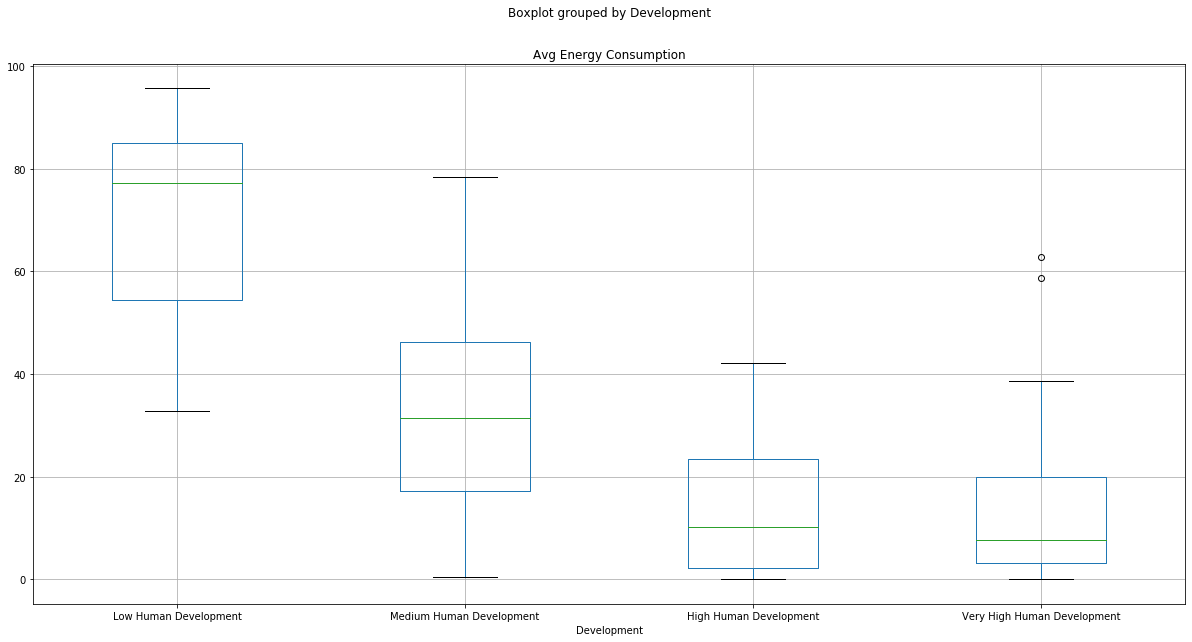

In [130]:
# Creating a boxplot for each segment:
merged_df.boxplot("Avg Energy Consumption", by="Development", figsize = (20,10))
group1 = merged_df.loc[merged_df["Development"]=="Low Human Development"]["Avg Energy Consumption"]
group2 = merged_df.loc[merged_df["Development"]=="Medium Human Development"]["Avg Energy Consumption"]
group3 = merged_df.loc[merged_df["Development"]=="High Human Development"]["Avg Energy Consumption"]
group4 = merged_df.loc[merged_df["Development"]=="Very High Human Development"]["Avg Energy Consumption"]

# Perform ANOVA to  test the validity of the null hypothesis which states a commonly accepted claim about a population. 
stats.f_oneway(group1,group2,group3,group4)

In [24]:
# Final version of out dataset
merged_df.head()

,Country Name,HDI Rank (2018),1990_HDI,1991_HDI,1992_HDI,1993_HDI,1994_HDI,1995_HDI,1996_HDI,1997_HDI,...,2010_EC,2011_EC,2012_EC,2013_EC,2014_EC,2015_EC,Avg HDI,Avg Energy Consumption,Total Energy Consumption,Development
0,Afghanistan,170,0.3,0.3,0.31,0.31,0.3,0.33,0.33,0.34,...,14.84,11.48,13.97,16.33,19.31,18.42,0.3836,32.726250,785.43,Low Human Development
1,Albania,69,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,37.12,35.96,40.05,41.29,38.69,38.62,0.6856,40.551667,973.24,Medium Human Development
2,Algeria,82,0.58,0.58,0.59,0.59,0.6,0.6,0.61,0.62,...,0.26,0.18,0.19,0.14,0.07,0.06,0.6652,0.377500,9.06,Medium Human Development
3,Argentina,48,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,8.96,10.12,9.87,10.21,10.90,10.04,0.7724,10.154583,243.71,High Human Development
4,Armenia,81,0.63,0.63,0.58,0.59,0.6,0.6,0.61,0.62,...,9.36,8.01,6.57,6.77,7.72,15.79,0.6684,8.228750,197.49,Medium Human Development


In [25]:
merged_df["Total HDI"]=merged_df.iloc[:,2:27].sum(axis=1)
#average 
merged_df["Avg Renewable Energy Share 2010-2015"]=merged_df.iloc[:,47:52].sum(axis=1)/5
merged_df["Avg Renewable Energy Share 2004-2009"]=merged_df.iloc[:,41:46].sum(axis=1)/5
#avg renewable energy share 2010-2015 -- avg reneweable energy share 2004-2009
merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"]=merged_df.iloc[:,54]-(merged_df.iloc[:,41:46].sum(axis=1)/5)

merged_df["Total Energy Consumption"]=merged_df.iloc[:,28:52].sum(axis=1)
merged_df["Avg HDI"]=merged_df.iloc[:,2:27].mean(axis=1)
merged_df["Avg HDI 2004-2015"]=merged_df.iloc[:,16:27].mean(axis=1)
merged_df["Avg Energy Consumption"]=merged_df.iloc[:,28:52].mean(axis=1)

In [26]:
merged_df

,Country Name,HDI Rank (2018),1990_HDI,1991_HDI,1992_HDI,1993_HDI,1994_HDI,1995_HDI,1996_HDI,1997_HDI,...,2015_EC,Avg HDI,Avg Energy Consumption,Total Energy Consumption,Development,Total HDI,Avg Renewable Energy Share 2010-2015,Avg Renewable Energy Share 2004-2009,Renewable Energy Share Change 2004-2009 vs 2010-2015,Avg HDI 2004-2015
0,Afghanistan,170,0.3,0.3,0.31,0.31,0.3,0.33,0.33,0.34,...,18.42,0.3836,32.726250,785.43,Low Human Development,9.59,14.886,40.796,-40.4124,0.448182
1,Albania,69,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,38.62,0.6856,40.551667,973.24,Medium Human Development,17.14,38.328,34.074,-33.3884,0.737273
2,Algeria,82,0.58,0.58,0.59,0.59,0.6,0.6,0.61,0.62,...,0.06,0.6652,0.377500,9.06,Medium Human Development,16.63,0.216,0.462,0.2032,0.720909
3,Argentina,48,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,10.04,0.7724,10.154583,243.71,High Human Development,19.31,9.546,9.782,-9.0096,0.808182
4,Armenia,81,0.63,0.63,0.58,0.59,0.6,0.6,0.61,0.62,...,15.79,0.6684,8.228750,197.49,Medium Human Development,16.71,7.702,7.936,-7.2676,0.721818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,United Kingdom,15,0.78,0.79,0.8,0.81,0.83,0.84,0.84,0.85,...,8.71,0.8656,1.811250,43.47,Very High Human Development,21.64,4.438,1.362,-0.4964,0.900000
121,Uruguay,57,0.69,0.7,0.7,0.7,0.71,0.71,0.72,0.73,...,58.02,0.7452,42.192500,1012.62,High Human Development,18.63,48.924,39.692,-38.9468,0.774545
122,World,,0.6,0.6,0.6,0.61,0.61,0.62,0.62,0.62,...,18.05,0.6544,17.475000,419.40,Medium Human Development,16.36,17.432,17.120,-16.4656,0.691818
123,Zambia,143,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0.42,...,87.99,0.4664,88.574583,2125.79,Low Human Development,11.66,90.440,90.132,-89.6656,0.516364


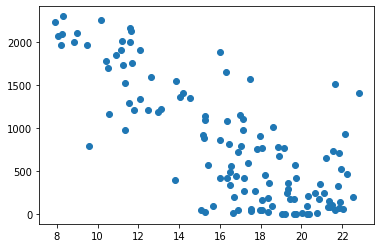

In [27]:
plt.scatter(merged_df["Total HDI"], merged_df["Total Energy Consumption"])

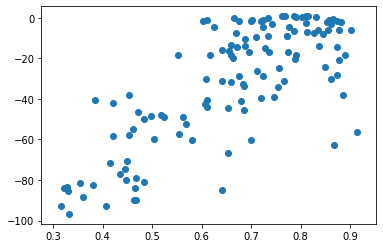

In [28]:
plt.scatter(merged_df["Avg HDI"], merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"])

Text(0.32, 11, 'y = 143.74x + -132.67')

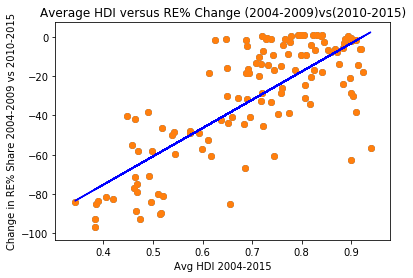

In [29]:
plt.scatter(merged_df["Avg HDI 2004-2015"], merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"])
plt.title("Average HDI versus RE% Change (2004-2009)vs(2010-2015)")
plt.xlabel("Avg HDI 2004-2015")
plt.ylabel("Change in RE% Share 2004-2009 vs 2010-2015")

x_values = merged_df["Avg HDI 2004-2015"]
y_values = merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "b")
plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")